In [1]:
import numpy as np
import numba as nb

Training an Autoencoder
---

In this file I show how to build and train an autoencoder using my liblary $NeuralNet.py$ on example of load_digits dataset.    
$NeuralNet.py$ is where I implemented a code that allows to create a fully connected Neural Networkhat, that 
can be optimzed using Stochastic Gradient Descent.   

---

1. Firstly I upload the activation functions and NN class:

In [2]:
from NeuralNet import leaky_relu
from NeuralNet import sigmoid
from NeuralNet import tanh
from NeuralNet import NN

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

2. Then I upload and pre-process the data on which I will train my model on:

In [3]:
# ========== Load digits data (8x8) ==========
digits = load_digits()
X = digits.images # Shape (n_samples, 8, 8)
y = digits.target


# Flatten images into vectors (64 features)
X_flat = X.reshape((len(X), -1))


# Normalize to [0, 1]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_flat)

3. Data Augmentation: shift digits    
   Shift each image up, down, right, and left by one pixel to create more training data.

In [4]:
# ========== Data Augmentation: shift digits ==========
def shift_image(img, dx, dy):
    """
    Shift image by dx (left/right) and dy (up/down).
    Empty pixels are filled with 0.
    """
    shifted = np.zeros_like(img)
    h, w = img.shape
    x_start = max(0, dx)
    y_start = max(0, dy)
    x_end = w + min(0, dx)
    y_end = h + min(0, dy)
    shifted[y_start:y_end, x_start:x_end] = img[y_start-dy:y_end-dy, x_start-dx:x_end-dx]
    return shifted


augmented_images = []
for img in X:
    augmented_images.append(img)
    augmented_images.append(shift_image(img, 1, 0)) # Right
    augmented_images.append(shift_image(img, -1, 0)) # Left
    augmented_images.append(shift_image(img, 0, 1)) # Down
    augmented_images.append(shift_image(img, 0, -1)) # Up


X_aug = np.array(augmented_images)
X_aug_flat = X_aug.reshape((len(X_aug), -1))
X_aug_scaled = scaler.fit_transform(X_aug_flat)

# ========== Train/Test Split ==========
X_train, X_test, _, _ = train_test_split(
X_aug_scaled, np.zeros(len(X_aug_scaled)),
test_size=0.2, random_state=42
)

3. Setting the Autoencoder's architecture and training it:

In [5]:
# ========== Create the Autoencoder ==========
autoencoder = NN(input_size=64)

# -------- Encoder --------
autoencoder.add_layer(50, activation_function=tanh)
autoencoder.add_layer(40, activation_function=tanh)
autoencoder.add_layer(36, activation_function=tanh)  # Bottleneck

# -------- Decoder --------
autoencoder.add_layer(40, activation_function=tanh)
autoencoder.add_layer(50, activation_function=tanh)
autoencoder.add_layer(64, activation_function=sigmoid)  # Output layer

# ========== Training ==========
n_epochs = 2500
learning_rate = 0.01
avg_losses = []

for epoch in range(n_epochs):
    losses = []
    for x in X_train:
        out = autoencoder._predict(x)
        loss = autoencoder.backward(x, lr=learning_rate)  # x == y_true
        losses.append(loss)
    avg_loss = np.mean(losses)
    avg_losses.append(avg_loss)
    if epoch+1 == 1 or epoch % 5 ==0 :
        print(f"Epoch {epoch+1}/{n_epochs} - Loss: {avg_loss:.5f}")


Epoch 1/2500 - Loss: 4.28873
Epoch 6/2500 - Loss: 2.79839
Epoch 11/2500 - Loss: 2.63854
Epoch 16/2500 - Loss: 2.53725
Epoch 21/2500 - Loss: 2.34702
Epoch 26/2500 - Loss: 2.29987
Epoch 31/2500 - Loss: 2.20050
Epoch 36/2500 - Loss: 2.16570
Epoch 41/2500 - Loss: 2.13294
Epoch 46/2500 - Loss: 2.10127
Epoch 51/2500 - Loss: 2.07530
Epoch 56/2500 - Loss: 2.05064
Epoch 61/2500 - Loss: 2.02813
Epoch 66/2500 - Loss: 1.99283
Epoch 71/2500 - Loss: 1.96892
Epoch 76/2500 - Loss: 1.93458
Epoch 81/2500 - Loss: 1.91182
Epoch 86/2500 - Loss: 1.89443
Epoch 91/2500 - Loss: 1.87322
Epoch 96/2500 - Loss: 1.85826
Epoch 101/2500 - Loss: 1.84168
Epoch 106/2500 - Loss: 1.82654
Epoch 111/2500 - Loss: 1.81550
Epoch 116/2500 - Loss: 1.80274
Epoch 121/2500 - Loss: 1.80725
Epoch 126/2500 - Loss: 1.78971
Epoch 131/2500 - Loss: 1.77452
Epoch 136/2500 - Loss: 1.76866
Epoch 141/2500 - Loss: 1.75898
Epoch 146/2500 - Loss: 1.77496
Epoch 151/2500 - Loss: 1.74978
Epoch 156/2500 - Loss: 1.74236
Epoch 161/2500 - Loss: 1.68407

---
Because the loss is still big, I am continuing the training:

In [12]:
n_epochs = 1200
learning_rate = 0.01


for epoch in range(n_epochs):
    losses = []
    for x in X_train:
        out = autoencoder._predict(x)
        loss = autoencoder.backward(x, lr=learning_rate)  # x == y_true
        losses.append(loss)
    avg_loss = np.mean(losses)
    avg_losses.append(avg_loss)
    if epoch+1 == 1 or epoch % 5 ==0 :
        print(f"Epoch {epoch+1}/{n_epochs} - Loss: {avg_loss:.5f}")


Epoch 1/1200 - Loss: 0.83294
Epoch 6/1200 - Loss: 0.83384
Epoch 11/1200 - Loss: 0.83394
Epoch 16/1200 - Loss: 0.83838
Epoch 21/1200 - Loss: 0.84498
Epoch 26/1200 - Loss: 0.83810
Epoch 31/1200 - Loss: 0.83521
Epoch 36/1200 - Loss: 0.83184
Epoch 41/1200 - Loss: 0.82661
Epoch 46/1200 - Loss: 0.82642
Epoch 51/1200 - Loss: 0.82715
Epoch 56/1200 - Loss: 0.82785
Epoch 61/1200 - Loss: 0.82811
Epoch 66/1200 - Loss: 0.82601
Epoch 71/1200 - Loss: 0.82470
Epoch 76/1200 - Loss: 0.82951
Epoch 81/1200 - Loss: 0.82602
Epoch 86/1200 - Loss: 0.83114
Epoch 91/1200 - Loss: 0.82871
Epoch 96/1200 - Loss: 0.82744
Epoch 101/1200 - Loss: 0.85799
Epoch 106/1200 - Loss: 0.82884
Epoch 111/1200 - Loss: 0.82527
Epoch 116/1200 - Loss: 0.82971
Epoch 121/1200 - Loss: 0.83637
Epoch 126/1200 - Loss: 0.82138
Epoch 131/1200 - Loss: 0.81904
Epoch 136/1200 - Loss: 0.82089
Epoch 141/1200 - Loss: 0.81724
Epoch 146/1200 - Loss: 0.81982
Epoch 151/1200 - Loss: 0.83112
Epoch 156/1200 - Loss: 0.81535
Epoch 161/1200 - Loss: 0.82506

The training loss 
---
Here I show how the training loss was decreasing during training:

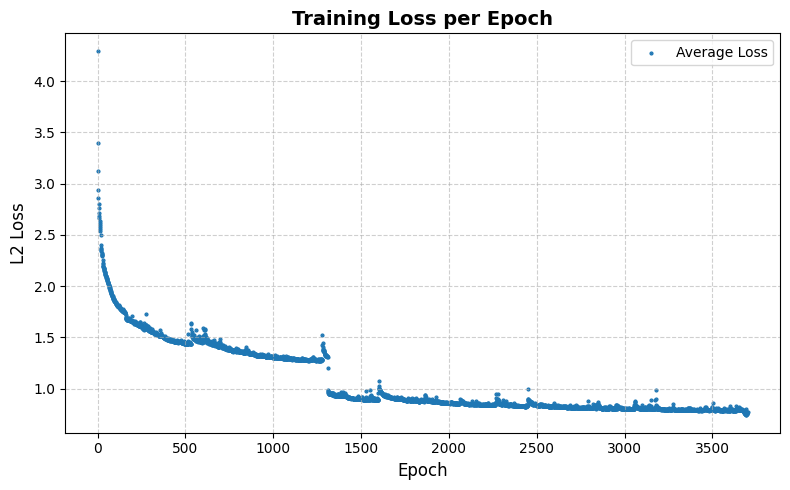

In [42]:
# Example continuation
epochs = np.arange(1, len(avg_losses) + 1)  
avg_losses = np.array(avg_losses)

plt.figure(figsize=(8, 5))
plt.scatter(epochs, avg_losses, marker='o', linestyle='-', linewidth=2, s=1, label="Average Loss")

plt.title("Training Loss per Epoch", fontsize=14, fontweight='bold')
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("L2 Loss", fontsize=12)

plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


 
 Test Set loss evaluation:
--
Loss for the test set:

In [43]:
test_losses = []
for x in X_test:
    out = autoencoder._predict(x)
    loss = autoencoder.error(x)  # compare reconstructed x to original x
    test_losses.append(loss)

avg_test_loss = np.mean(test_losses)
print("----------------------------------------")
print(f"Test Loss: {avg_test_loss:.5f}")
print("----------------------------------------")

----------------------------------------
Test Loss: 1.12068
----------------------------------------


Here I show, how the model deals with example digid from the test set (it has not seen this image during training).

Firstly, I show orginal image, then the compressed version (bottleneck) 
and at the end the reconstructed image:

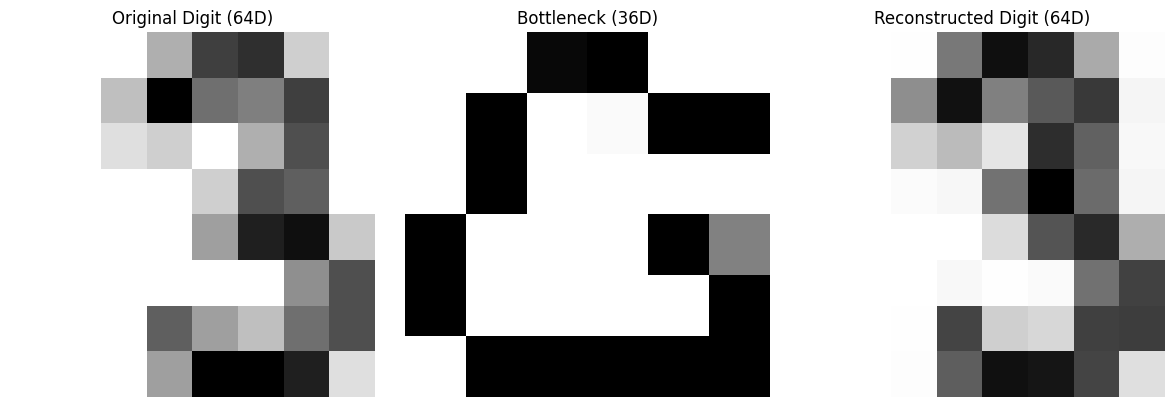

In [37]:
import matplotlib.pyplot as plt

# Select a sample from the test set
sample_idx = 48
x_sample = X_test[sample_idx]

# === Get original image ===
original_image = x_sample.reshape(8, 8)

# === Run through the autoencoder ===
_ = autoencoder._predict(x_sample)  # Forward pass
encoded = autoencoder.activations[3]  # Bottleneck output (32D)
reconstructed = autoencoder.activations[-1].reshape(8, 8)

# === Plotting ===
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Original
axs[0].imshow(original_image, cmap='binary')  # black digit, white background
axs[0].set_title("Original Digit (64D)")
axs[0].axis('off')

# Bottleneck
axs[1].imshow(encoded.reshape(6, 6), cmap='binary')  # reshape to visualize
axs[1].set_title("Bottleneck (36D)")
axs[1].axis('off')

# Reconstructed
axs[2].imshow(reconstructed, cmap='binary')
axs[2].set_title("Reconstructed Digit (64D)")
axs[2].axis('off')

plt.tight_layout()
plt.show()


Save the weights of the Autoencoder for later use:

In [44]:

# Get weights from each layer (list of lists of arrays)
layer_weights = [layer.get_weights() for layer in autoencoder.layers]

# Convert to numpy object array (this avoids the ValueError)
layer_weights_obj = np.array(layer_weights, dtype=object)

# Now save with pickle allowed
np.save('layer_weights.npy', layer_weights_obj, allow_pickle=True)
